# Food Analytics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

from scipy import stats

In [2]:
df = pd.read_csv(r'data/cleaned.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6865 non-null   int64 
 1   RecipeName              6865 non-null   object
 2   TranslatedRecipeName    6865 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6865 non-null   int64 
 6   CookTimeInMins          6865 non-null   int64 
 7   TotalTimeInMins         6865 non-null   int64 
 8   Servings                6865 non-null   int64 
 9   Cuisine                 6865 non-null   object
 10  Course                  6865 non-null   object
 11  Diet                    6865 non-null   object
 12  Instructions            6865 non-null   object
 13  TranslatedInstructions  6865 non-null   object
 14  URL                     6865 non-null   object
 15  Ingr

In [5]:
df.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,['masala karela recipe'],Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",['6 karela (bitter gourd/ pavakkai) - deseeded...,15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","['to begin making the\xa0masala karela recipe,...",https://www.archanaskitchen.com/masala-karela-...
1,2,['Tomato Puliogre Recipe - spicy tomato rice (...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","['2-1 / 2 cups rice - cooked', ' 3 tomatoes', ...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"['to make tomato puliogere, first cut the toma...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,['ragi semiya upma recipe - ragi millet vermic...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","['1-1/2 cups rice vermicelli noodles (thin)', ...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","[""to begin making the ragi vermicelli recipe, ...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,['gongura chicken curry recipe - andhra style ...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","['500 grams chicken', '2 onion - chopped', '1 ...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,['to begin making\xa0gongura chicken curry rec...,http://www.archanaskitchen.com/gongura-chicken...
4,5,['Andhra Style Alam Pachadi Recipe - adrak chu...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","['1 tablespoon chana dal', ' 1 tablespoon whit...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"['to make andhra style alam pachadi, first hea...",https://www.archanaskitchen.com/andhra-style-a...


## EDA

#### Type of diets

<AxesSubplot:xlabel='count', ylabel='Diet'>

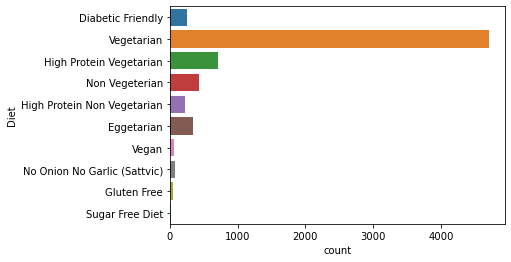

In [6]:
sns.countplot(data=df, y='Diet')

#### The counts of all courses

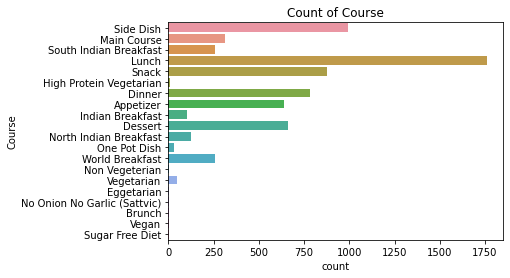

In [7]:
sns.countplot(data=df, y='Course')
plt.title("Count of Course")
plt.show()

## Cuisines

### Number of Recipes from each Cuisine

#### Wordcloud (cuisine count)

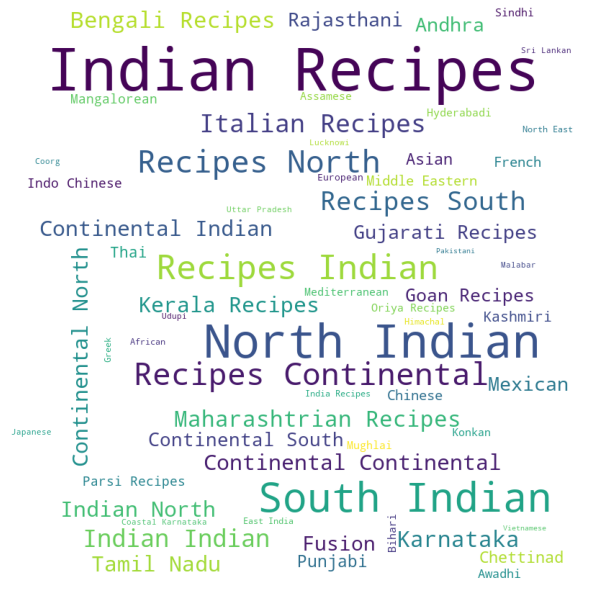

In [9]:
text = " ".join(val for val in df.Cuisine)

wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

#### Top 20 Cuisines in the dataset

In [23]:
cuisine_count = df.Cuisine.value_counts().reset_index()

cuisine_count.head(20)

,index,Cuisine
0,Indian,1157
1,Continental,1020
2,North Indian Recipes,936
3,South Indian Recipes,681
4,Italian Recipes,235
5,Bengali Recipes,175
6,Maharashtrian Recipes,173
7,Kerala Recipes,163
8,Tamil Nadu,156
9,Karnataka,149


#### Total Preparation Time required for each cuisine

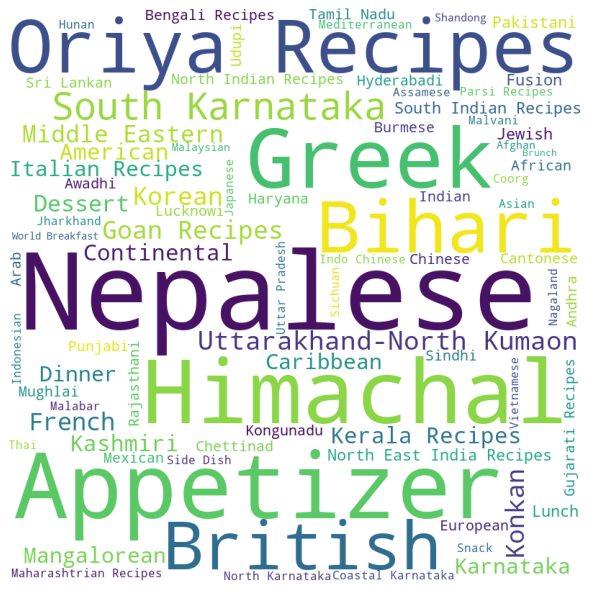

In [10]:
word_dict = round(df.groupby('Cuisine')['TotalTimeInMins'].mean()).to_dict()

word_time = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(word_dict)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(word_time)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### Ranking of Cuisines (Total Preparation time in minutes)

#### Top 10

In [20]:
round(df.groupby('Cuisine')['TotalTimeInMins'].mean()).sort_values(ascending=False).head(10)

Cuisine
Nepalese                    219.0
Appetizer                   152.0
Himachal                    142.0
Greek                       123.0
Oriya Recipes               116.0
Bihari                      111.0
British                     101.0
South Karnataka              98.0
Uttarakhand-North Kumaon     92.0
Konkan                       85.0
Name: TotalTimeInMins, dtype: float64

#### Last 10

In [21]:
round(df.groupby('Cuisine')['TotalTimeInMins'].mean()).sort_values(ascending=False).tail(10)

Cuisine
Uttar Pradesh      37.0
Vietnamese         37.0
Jharkhand          35.0
Malvani            34.0
Hunan              33.0
Afghan             30.0
Shandong           30.0
Malaysian          29.0
World Breakfast    24.0
Brunch             20.0
Name: TotalTimeInMins, dtype: float64

### Average Number of Ingredients required in each cuisine

In [11]:
df["IngredientsCount"] = df['TranslatedIngredients'].apply(lambda x: x.split(",")).apply(lambda x: len(x))

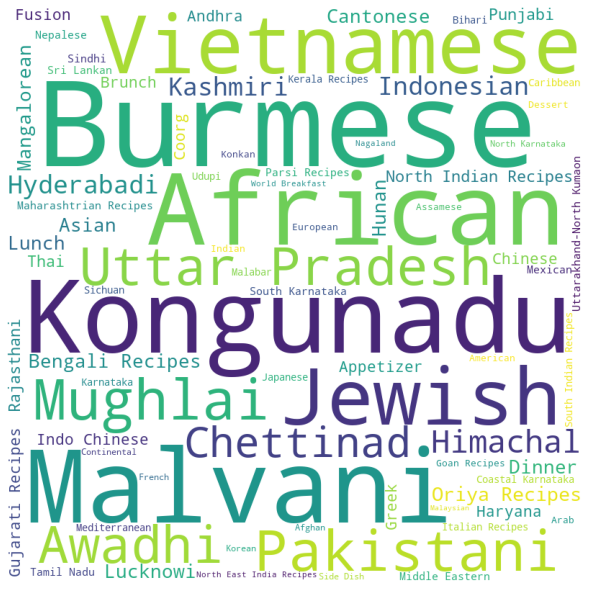

In [12]:
word_dict2 = round(df.groupby('Cuisine')['IngredientsCount'].mean()).to_dict()

ing_count = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(word_dict2)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(ing_count)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### Ranking of Cuisines (Number of Ingredients)

#### Top 10

In [18]:
round(df.groupby('Cuisine')['IngredientsCount'].mean()).sort_values(ascending=False).head(10)

Cuisine
Burmese          25.0
Kongunadu        18.0
Malvani          18.0
African          17.0
Vietnamese       17.0
Pakistani        16.0
Uttar Pradesh    16.0
Mughlai          16.0
Jewish           16.0
Indonesian       15.0
Name: IngredientsCount, dtype: float64

#### Last 10

In [19]:
round(df.groupby('Cuisine')['IngredientsCount'].mean()).sort_values(ascending=False).tail(10)

Cuisine
French                      10.0
Continental                 10.0
North East India Recipes     9.0
Nagaland                     9.0
World Breakfast              9.0
Malaysian                    8.0
Shandong                     7.0
Snack                        7.0
British                      7.0
Jharkhand                    6.0
Name: IngredientsCount, dtype: float64

## Preparation time vs. servings

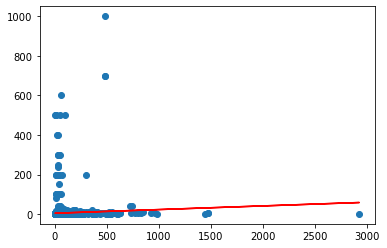

In [33]:
res = stats.linregress(df.TotalTimeInMins, df.Servings)

plt.plot(df.TotalTimeInMins, df.Servings, 'o')
plt.plot(df.TotalTimeInMins, res.intercept + res.slope * df.TotalTimeInMins, 'r', label='trend')
plt.show()

In [36]:
res.slope

0.018482270850687373

## Preparation time vs. count of ingredients

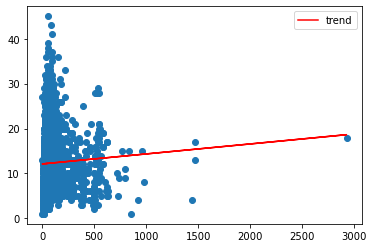

In [35]:
ing_count = stats.linregress(df.TotalTimeInMins, df.IngredientsCount)

plt.plot(df.TotalTimeInMins, df.IngredientsCount, 'o')
plt.plot(df.TotalTimeInMins, ing_count.intercept + ing_count.slope * df.TotalTimeInMins, 'r', label='trend')
plt.legend()
plt.show()

In [37]:
ing_count.slope

0.002225596188139472